Generating X sample and showing it

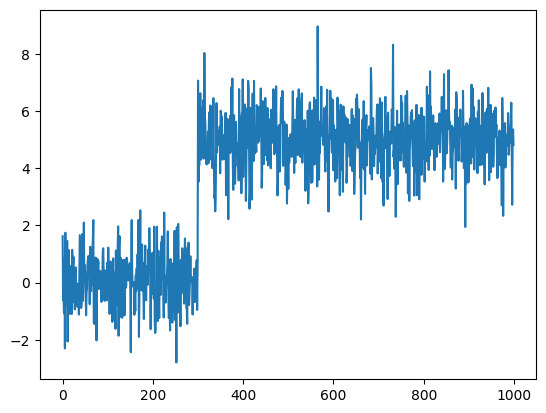

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
plt.plot(X)
plt.show()

Obtaining the distribution of the X data using the Parzen window method with the Gaussian kernel

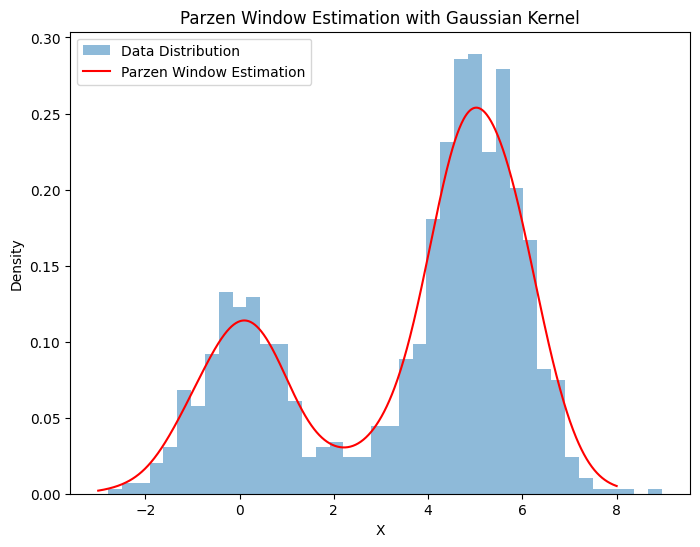

In [3]:

def parzen_estimation(data, query_points, h):
    pdf = []
    for x in query_points:
        # Using Gaussian Kernel
        kernel = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((data - x) / h) ** 2)
        pdf.append(np.mean(kernel) / h)
    return np.array(pdf)

# Generating query points to estimate the distribution
query_points = np.linspace(-3, 8, 1000)

# Bandwidth parameter
h = 0.5

# Calculating the probability density function using Parzen window
pdf = parzen_estimation(X, query_points, h)

# Plotting the estimated distribution
plt.figure(figsize=(8, 6))
plt.hist(X, bins=40, density=True, alpha=0.5, label='Data Distribution')
plt.plot(query_points, pdf, label='Parzen Window Estimation', color='red')
plt.title('Parzen Window Estimation with Gaussian Kernel')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()


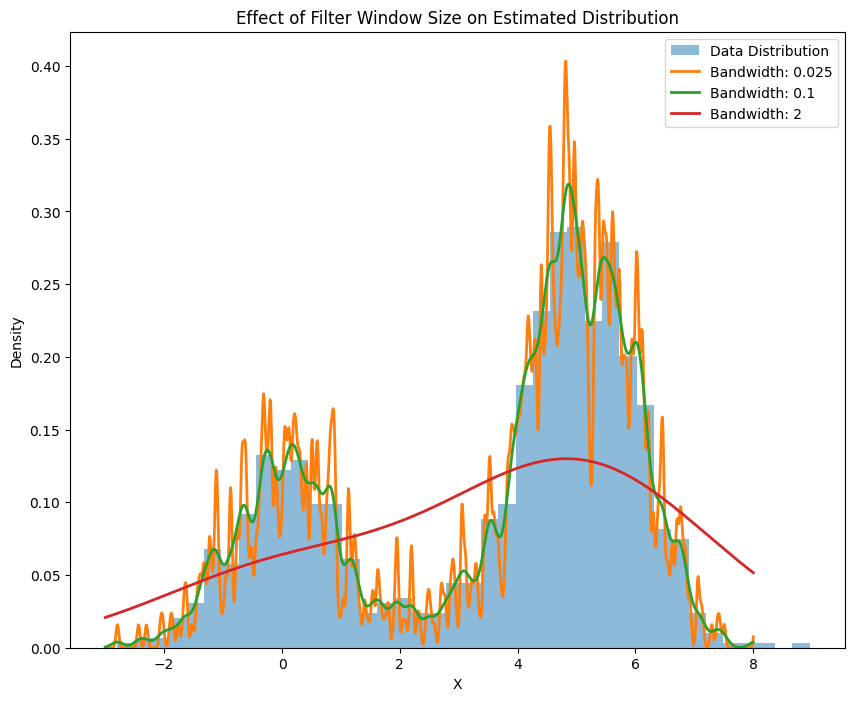

In [8]:

# Bandwidth parameters to test
bandwidths = [0.025, 0.1, 2]

plt.figure(figsize=(10, 8))

# Plotting the original data distribution
plt.hist(X, bins=40, density=True, alpha=0.5, label='Data Distribution')

# Estimating distributions for different bandwidths
for h in bandwidths:
    pdf = parzen_estimation(X, query_points, h)
    plt.plot(query_points, pdf, label=f'Bandwidth: {h}', linewidth=2)

plt.title('Effect of Filter Window Size on Estimated Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()
